# Kaggle Competition Example - Housing Price Prediction

This notebook is a simple example of a machine learning project for prediciting the cost of a house in Ames, Iowa for this [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
### IMPORTS ###

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

In [2]:
### FUNCTIONS ###

def divider():
    print("\n", "-"*50, "\n")

def clean_nulls(dataframe):
    df = dataframe.copy()
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        dtype = df[column_name].dtype
        if count > 0:
            if dtype == 'O':
                df[column_name].fillna('NA', inplace=True)
            elif dtype == 'float64':
                df[column_name].fillna(0, inplace=True)
    return df

def apply_all_transforms(dataframe):
    def encode_pr(x): return 1 if x == 'Partial' else 0
    def encode_ta(x): return 1 if x == 'TA' else 0
    def encode_gd(x): return 1 if x == 'Gd' else 0
    
    df = dataframe.copy()
    df = clean_nulls(df) # Setting null values to NA for categorical and 0 for numeric
    
    # Perform encoding for categorical features
    df['enc_street']    = pd.get_dummies(df.Street, drop_first=True)
    df['enc_ext_ta']    = df.ExterQual.apply(encode_ta)
    #df['enc_ext_gd']    = df.ExterQual.apply(encode_gd)
    #df['enc_ext_ta']    = df.ExterQual.apply(encode_ta)
    #df['enc_ext_gd']    = df.ExterQual.apply(encode_gd)
    #df['enc_bsmt_ta']   = df.BsmtQual.apply(encode_ta)
    #df['enc_bsmt_gd']   = df.BsmtQual.apply(encode_gd)
    #df['enc_extc_ta']   = df.ExterCond.apply(encode_ta)
    #df['enc_extc_gd']   = df.ExterCond.apply(encode_gd)
    #df['enc_bsmtc_ta']  = df.BsmtCond.apply(encode_ta)
    #df['enc_bsmtc_gd']  = df.BsmtCond.apply(encode_gd)
    #df['enc_condition'] = df.SaleCondition.apply(encode_pr)
    
    # Remove any features that are not numeric
    df = df.select_dtypes(include=[np.number])
    
    return df

def evaluate(model, name):
    predictions = model.predict(X_test)
    
    print("EVALUATING MODEL :", name)
    print("R^2  :", model.score(X_test, y_test))
    print("RMSE :", mean_squared_error(y_test, predictions))

    actual_values = y_test
    plt.scatter(predictions, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(model.score(X_test, y_test), mean_squared_error(y_test, predictions))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    
def cross_validate(model, X, y, name):
    print("CROSS-VALIDATING MODEL :", name)
    
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("RMSE SCORES :", rmse_scores)
    print("MEAN        :", rmse_scores.mean())
    print("STD DEV     :", rmse_scores.std())

In [3]:
### ACQUIRE DATA ###

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [4]:
### TRANSFORM ###

train_mod = apply_all_transforms(train)
test_mod = apply_all_transforms(test)

In [5]:
### MODEL ###

y = np.log(train_mod.SalePrice)
X = train_mod.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor()
dt_model = tree_reg.fit(X_train, y_train)

forest_reg = RandomForestRegressor()
rf_model = forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



 -------------------------------------------------- 

EVALUATING MODEL : Linear Regression
R^2  : 0.863619298859
RMSE : 0.0232435515529


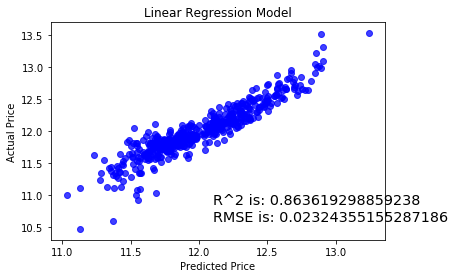

CROSS-VALIDATING MODEL : Linear Regression
RMSE SCORES : [ 0.13624779  0.19270732  0.14138439  0.2791176   0.17507951  0.13236087
  0.11881175  0.12686693  0.28232657  0.11341491]
MEAN        : 0.169831765503
STD DEV     : 0.0601019051585

 -------------------------------------------------- 

EVALUATING MODEL : Decision Tree Regressor
R^2  : 0.709305129222
RMSE : 0.0495435289492


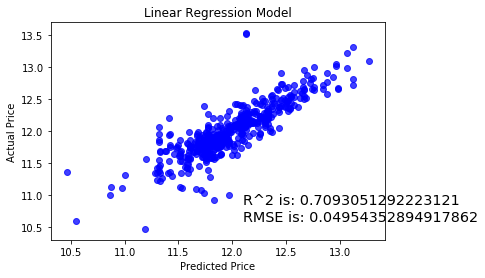

CROSS-VALIDATING MODEL : Decision Tree Regressor
RMSE SCORES : [ 0.194187    0.2447499   0.21374843  0.21570937  0.23599599  0.22472671
  0.20095682  0.22307858  0.24257803  0.16851329]
MEAN        : 0.216424411343
STD DEV     : 0.0224042271502

 -------------------------------------------------- 

EVALUATING MODEL : Random Forest Regressor
R^2  : 0.85707160729
RMSE : 0.0243594836845


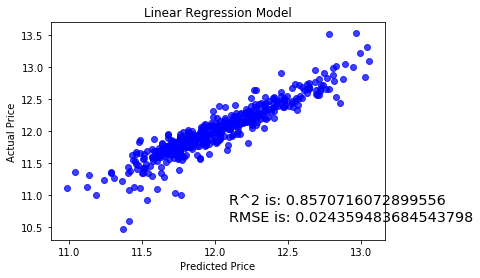

CROSS-VALIDATING MODEL : Random Forest Regressor
RMSE SCORES : [ 0.14238896  0.18253879  0.16298878  0.18074763  0.20588321  0.15484497
  0.14636113  0.14720522  0.15497274  0.10135004]
MEAN        : 0.157928147
STD DEV     : 0.0267605597794


In [6]:
### EVALUATE ###

divider()
evaluate(lr_model, "Linear Regression")
cross_validate(LinearRegression(), X_train, y_train, "Linear Regression")

divider()
evaluate(dt_model, "Decision Tree Regressor")
cross_validate(DecisionTreeRegressor(), X_train, y_train, "Decision Tree Regressor")

divider()
evaluate(rf_model, "Random Forest Regressor")
cross_validate(RandomForestRegressor(), X_train, y_train, "Random Forest Regressor")

In [7]:
### SELECT MODEL ###

model = rf_model

In [8]:
### PREPARE SUBMISSION ###

submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test_mod.select_dtypes(include=[np.number]).drop(['Id'], axis=1)

predictions = model.predict(feats)
final_predictions = np.exp(predictions)

submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,126734.065639
1,1462,156137.432827
2,1463,196425.254292
3,1464,176399.039678
4,1465,185700.887525


In [9]:
### GENERATE SUBMISSION AND SAVE MODELS ###

submission.to_csv('submission.csv', index=False)
joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(dt_model, "dt_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']